# Pythonでの可視化の基本 (matplotlib)

In [1]:
# 色々なライブラリのインポート
import matplotlib.pyplot as plt # matplotlib を plt としてインポート
import numpy as np # numpy を np としてインポート
import pandas as pd # pandas を pd としてインポート
from mpl_toolkits.mplot3d import Axes3D # あとで3次元プロットのときに使う
from matplotlib import animation # あとでアニメーションのときに使う
from IPython.display import HTML # あとでアニメーションのときに使う

In [2]:
# デフォルトのスタイルを指定するパラメターのセット
# 辞書型 {'key': 'value'} で指定される。
params = {'legend.fontsize': 'large', # フォントサイズ
         'axes.labelsize': 'x-large', # 軸のラベルのサイズ, x-large: extra large のこと
         'axes.titlesize':'x-large', # 軸のタイトルのサイズ
         'xtick.labelsize':'x-large', # x軸の目盛りのラベルのサイズ
         'ytick.labelsize':'x-large', # y軸の目盛りのラベルのサイズ
         'xtick.direction':'in', # x軸の目盛りの向き, in: 内側, out: 外側
         'ytick.direction':'in', # y軸の目盛りの向き
         }
plt.rcParams.update(params)

補足：他のパラメター（フォントの種類など）についても設定できる。より詳しくは
https://matplotlib.org/stable/users/explain/customizing.html
を参照。

# 折れ線グラフ

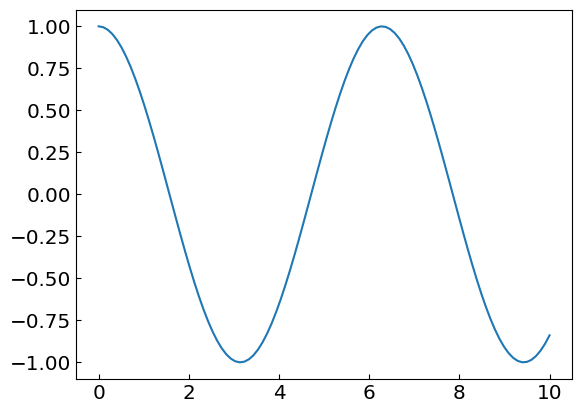

In [3]:
# 0から10の間で100個の等間隔の値をxというnumpyのarrayに格納：
numpoints = 100
x = np.linspace(0, 10, numpoints)

# 各xでのcos(x)の値を計算し、配列yに格納：
# xはラジアン。
y = np.cos(x)

# プロットして、結果を表示
plt.plot(x, y) # プロット
plt.show() # 表示

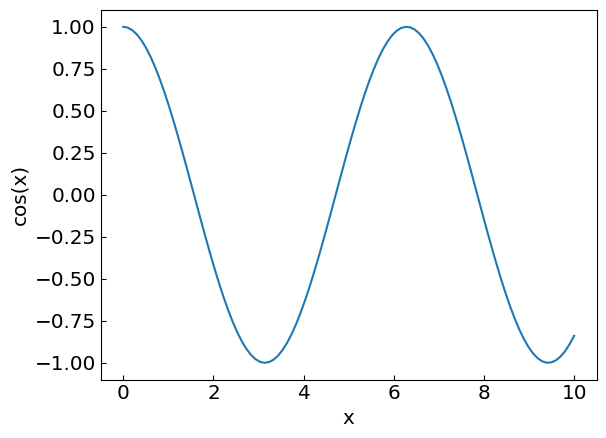

In [4]:
# 軸のラベルを追加して、体裁を整える：

plt.xlabel("x")
plt.ylabel("cos(x)")

plt.plot(x, y)
plt.show()

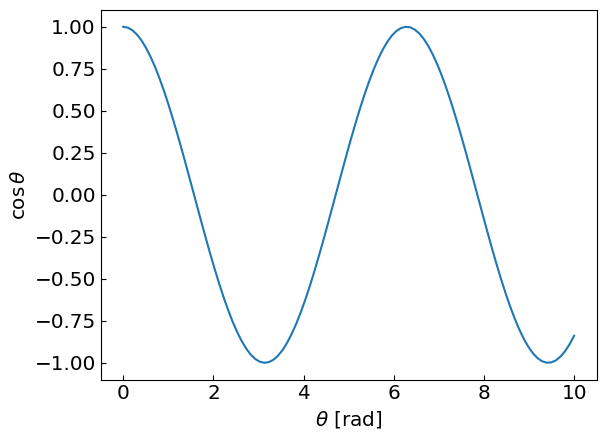

In [5]:
# 軸のラベルには、LaTeXのコマンドも使える：
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"$\cos \theta$")

plt.plot(x, y)
plt.show()

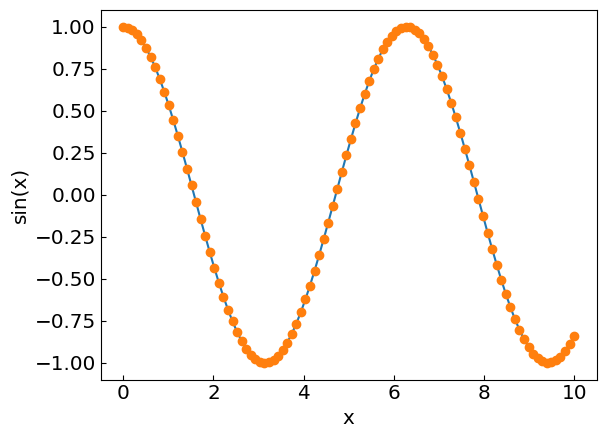

In [6]:
# Matplotlibのデフォルトでは、データ点の間は線分で繋がれる。
# しかし、データを離散的な点としてもプロットすることができる。

plt.xlabel("x")
plt.ylabel("sin(x)")

# 折れ線グラフ
plt.plot(x, y)

# 離散的な点
plt.plot(x, y, "o") # "o" で点のスタイルを指定。
plt.show()

## 点のスタイルには他には
## ".", "v", "^", "<", ">", "8", "s", "p", "*", "h", "H", "D", "d", "P", "X"
## などがある

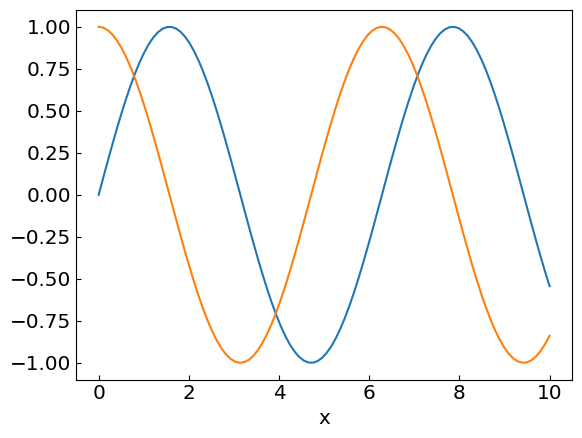

In [7]:
# 複数のプロット
# sin(x) と cos(x) をプロットしよう。

numpoints = 100
x = np.linspace(0, 10, numpoints)

# sin(x) と cos(x) の値を計算：
ysin = np.sin(x)
ycos = np.cos(x)

# プロットして結果を示す：
plt.xlabel("x")
plt.plot(x, ysin)
plt.plot(x, ycos)
plt.show()

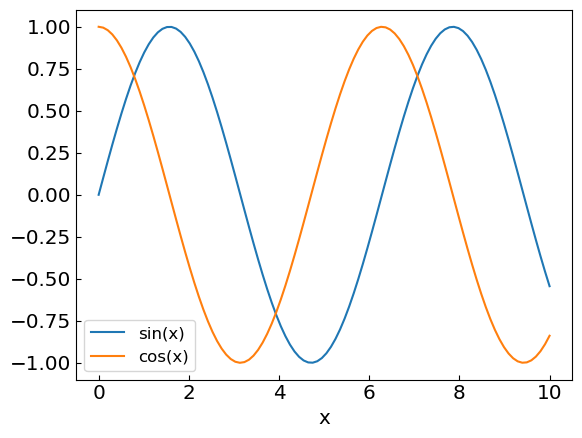

In [8]:
# 複数のデータがプロットされているときは、凡例(legend)を追加する。

plt.xlabel("x")
plt.plot(x, ysin, label = 'sin(x)')
plt.plot(x, ycos, label = 'cos(x)')
plt.legend()
plt.show()

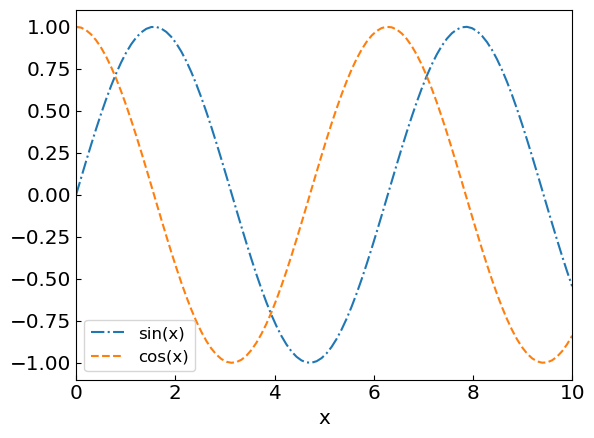

In [9]:
# 線種(linestyle)を変える

plt.xlabel("x")
plt.xlim(0,10)
plt.plot(x, ysin, label = 'sin(x)', linestyle = '-.')
plt.plot(x, ycos, label = 'cos(x)', linestyle = '--')
plt.legend()
plt.show()

## 線種には '-', '--', ':', '-.' などがある。

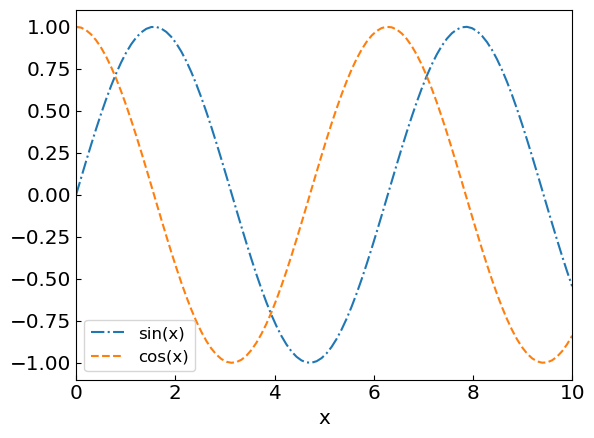

In [10]:
# グラフの保存(savefig)

plt.xlabel("x")
plt.xlim(0,10)
plt.plot(x, ysin, label = 'sin(x)', linestyle = '-.')
plt.plot(x, ycos, label = 'cos(x)', linestyle = '--')
plt.legend()
plt.savefig("./graph.pdf") # 保存先を指定("./"は現在のディレクトリを示す)

# 散布図

散布図では、データセットの各点(x,y)について、点描する。

ここでは、パルサー（回転する中性子星）の回転周期とその時間微分の分布を散布図としてプロットする。

データは、オーストラリア国立望遠鏡機構のパルサーカタログ
https://www.atnf.csiro.au/research/pulsar/psrcat/
から取ってきた。

In [11]:
# 上でインポートしたpandasを使って、パルサーのデータをファイルからdata frame(df)に読み込む。
# データは、(パルサーの名前, 回転周期 [s], 周期の時間微分 [s/s])という形式
df = pd.read_csv("./pulsar.csv")

# データの下処理。NaN (Not a number)を取り除く(drop)：
df = df.dropna()

In [12]:
# ちなみに、データの中身はこんな感じ：
df

,NAME,P0,P1
0,J0002+6216,0.115364,5.970000e-15
1,J0006+1834,0.693748,2.100000e-15
2,J0007+7303,0.315873,3.600000e-13
4,J0012+5431,3.025301,1.280000e-16
5,B0011+47,1.240699,5.640000e-16
...,...,...,...
4295,J2351+8533,1.011727,8.800000e-16
4297,B2351+61,0.944784,1.630000e-14
4299,J2355+0051,0.003719,3.220000e-21
4301,J2355+1523,1.094396,4.190000e-16


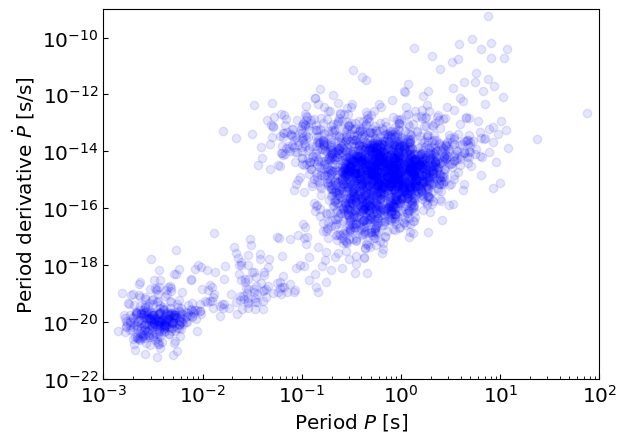

In [13]:
x = df['P0'].values # パルサーの周期 P0 [秒]
y = df['P1'].values # パルサーの周期の微分 P1 = d P0 /dt [秒/秒]

plt.scatter(x, y, color='blue', alpha=0.1) # alpha: 透過率

plt.xlabel(r'Period $P$ [s]')
plt.ylabel(r'Period derivative $\dot{P}$ [s/s]')

# 図示の範囲指定
plt.xlim(1e-3, 1e2)
plt.ylim(1e-22, 1e-9)

# x, y軸のスケールの設定
plt.xscale('log') # 線形('linear')ではなく対数スケール('log')に設定
plt.yscale('log')

plt.show()

/var/folders/69/9_nc30pj2jn716vdqhl0q97w0000gn/T/ipykernel_99201/1079581490.py:7: RuntimeWarning: invalid value encountered in sqrt
  B = 3.2e19 * np.sqrt(P * Pdot)  # Gauss
/var/folders/69/9_nc30pj2jn716vdqhl0q97w0000gn/T/ipykernel_99201/1079581490.py:8: RuntimeWarning: divide by zero encountered in divide
  tau_sec = P / (2 * Pdot)        # 秒


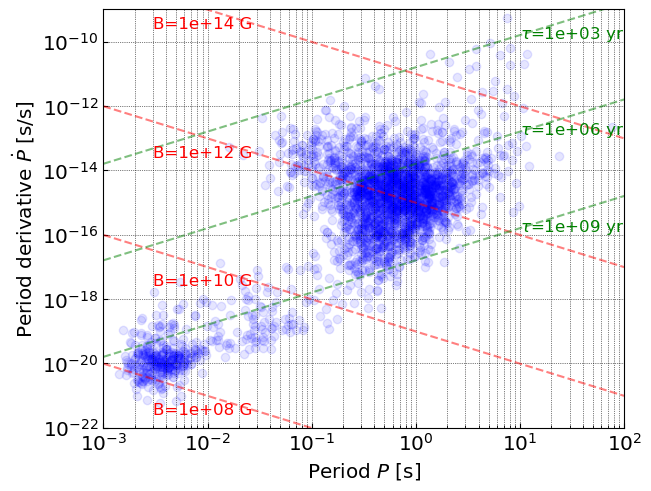

In [14]:
# 上の図にさらにグリッドや

P = df['P0'].values
Pdot = df['P1'].values

# 磁場と特性年齢計算
B = 3.2e19 * np.sqrt(P * Pdot)  # Gauss
tau_sec = P / (2 * Pdot)        # 秒
tau_year = tau_sec / (3.154e7)  # 年

# プロット
fig = plt.figure(constrained_layout = True) # 図 fig を生成。
ax = fig.subplots(1,1) # figについて軸 ax を生成。
ax.scatter(P, Pdot, color='blue', alpha=0.1) # 軸 ax 上に散布図をプロット
ax.grid(True, which='both', color="k", ls=':', lw=0.5) # グリッドを表示

# 軸のパラメターの設定。
# たとえば、pltの場合だと plt.xlabelでよかったのが、
# axについてだとax.set_xlabelと、"set_"というコマンドを追加する必要がある。
ax.set_xlabel(r'Period $P$ [s]')
ax.set_ylabel(r'Period derivative $\dot{P}$ [s/s]')
ax.set_xlim(1e-3, 1e2)
ax.set_ylim(1e-22, 1e-9)
ax.set_xscale('log')
ax.set_yscale('log')


# --------------
# 等磁場線のプロット
B_lines = [1e8, 1e10, 1e12, 1e14]  # Gauss
P_vals = np.logspace(-3, 2, 500)
for B_const in B_lines:
    Pdot_vals = (B_const / (3.2e19))**2 / P_vals
    ax.plot(P_vals, Pdot_vals, 'r--', alpha=0.5)
    # ラベル配置用
    ax.text(0.003, 0.08*(B_const/(3.2e19))**2/0.003, f"B={B_const:.0e} G",
            color='red', fontsize=12)

# 等特性年齢線のプロット
tau_lines = [1e3, 1e6, 1e9]  # 年
for tau_const in tau_lines:
    Pdot_vals = P_vals / (2 * tau_const * 3.154e7) 
    ax.plot(P_vals, Pdot_vals, 'g--', alpha=0.5)
    ax.text(10, 8/(2 * tau_const * 3.154e7), f"$\\tau$={tau_const:.0e} yr",
            color='green', fontsize=12)

plt.show()
# plt.savefig("./scatter_pulsar.pdf") # 保存

# 等高線/密度プロット

2次元データを可視化する際に使われる。たとえば、2変数関数$f(x,y)$を示すときなど。

ここでは例として、双極子の静電ポテンシャルを考える (無次元化したものを考える)：

$$V_{\rm dip}(x,y) = \frac{1}{\sqrt{(x-x_1)^2+(y-y_1)^2}} - \frac{1}{\sqrt{(x-x_2)^2+(y-y_2)^2}}$$
ここで、$(x_1, y_1)$と$(x_2,y_2)$はそれぞれ双極子の極のうち1つの座標を表す。

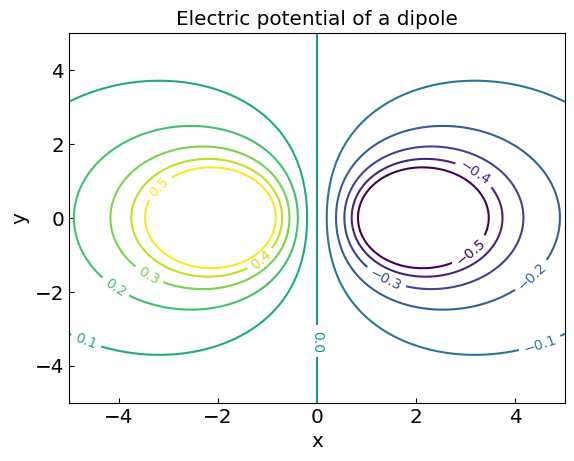

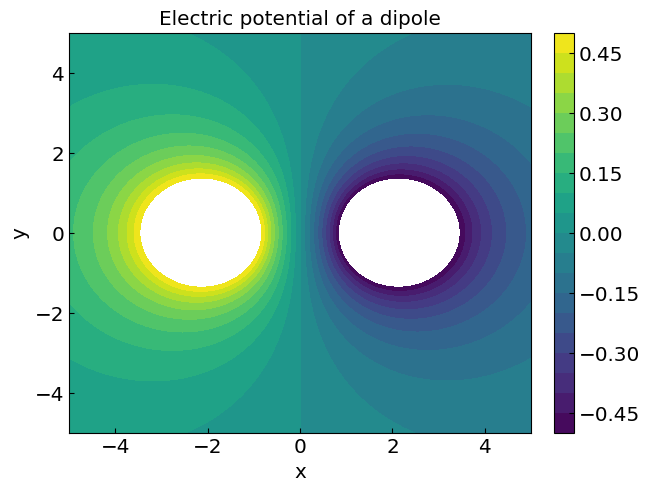

In [15]:
x = np.linspace(-5,5,200)
y = np.linspace(-5,5,200)

x1, y1 = -2., 0.
x2, y2 = 2., 0.

X, Y = np.meshgrid(x, y)

Vdip = 1./np.sqrt((X-x1)**2+(Y-y1)**2) - 1./np.sqrt((X-x2)**2+(Y-y2)**2)

# 等高線図(contour)：
plt.title("Electric potential of a dipole")
plt.xlabel("x")
plt.ylabel("y")

CS = plt.contour(X, Y, Vdip, levels = np.linspace(-0.5,0.5,11)) # contour をプロットする
plt.clabel(CS)
plt.show()

# 等高線の間を塗りつぶす：
fig2, ax2 = plt.subplots(constrained_layout=True)
ax2.set_title("Electric potential of a dipole")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
CS2 = ax2.contourf(CS, levels = np.linspace(-0.5,0.5,21))
fig2.colorbar(CS2)
plt.show()

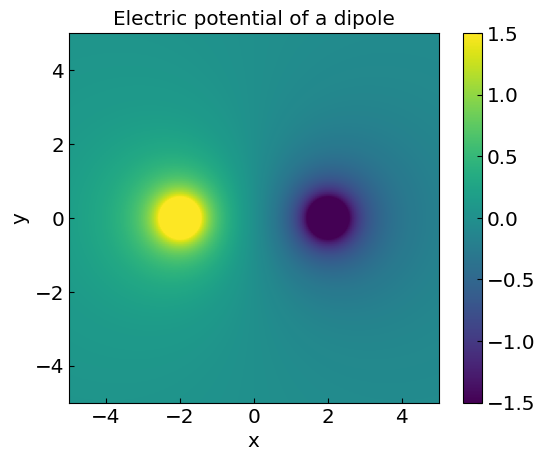

In [16]:
# imshow を使った密度プロットの例 (色の補間に適している)

plt.title("Electric potential of a dipole")
plt.xlabel("x")
plt.ylabel("y")
CS3 = plt.imshow(Vdip, vmax=1.5, vmin=-1.5,origin="lower",extent=[-5,5,-5,5])
plt.colorbar(CS3)
plt.show()


# 3次元プロット

上でインポートしたAxes3Dで、これまでと同じ双極子の静電ポテンシャルについて3次元プロットを作成

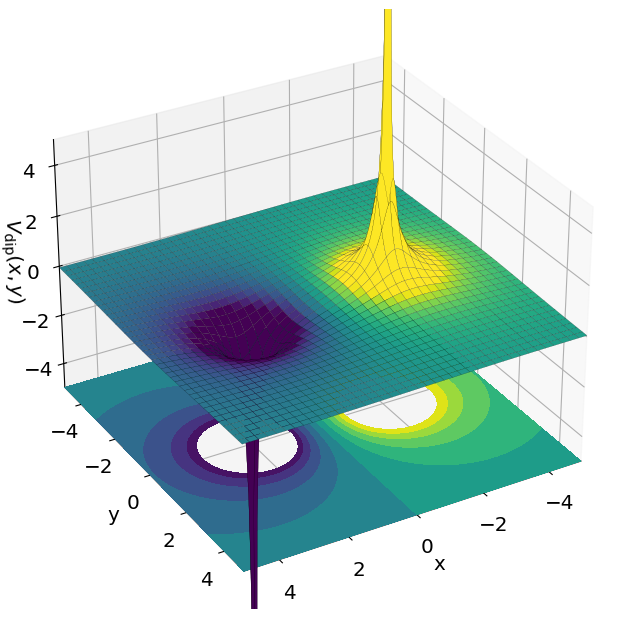

In [18]:
fig = plt.figure(constrained_layout=True, figsize=(9,6))
ax = Axes3D(fig)
fig.add_axes(ax)
Z = Vdip
# Z_clipped = np.clip(Z, -10, 10) # Z の値を -10 < z < 10 でクリップ。

# 3dの表面をプロット
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, vmin=-0.5, vmax=0.5,
                cmap=plt.cm.viridis, edgecolor="black", linewidth=0.1)

# z=-5 のx-y平面に等高線図をプロット
ax.contourf(X, Y, Z, offset=-5, zdir='z',levels = np.linspace(-0.5,0.5,11))

ax.set_zlim(-5, 5)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("$V_{\\rm dip}(x,y)$", labelpad=0)

ax.view_init(elev=30, azim=60) # 視点の変更。elev:仰角(elevation), azim:方位角(azimuthal)

plt.show()

# アニメーション

上でインポートしたanimationとHTMLでサイクロイドのアニメーションをプロットしてみる

In [19]:
r = 1 # サイクロイドの半径
t = np.linspace(0, 5*np.pi, 100) # 時間パラメータ
x = r * (t - np.sin(t))
y = r * (1 - np.cos(t))

xc, yc = r * t, np.full_like(t, r) # 円の中心位置

# 図の準備
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(0, x[-1])
ax.set_ylim(-0.5, 2*r + 0.5)
ax.set_title("Cycloid Animation")

# プロット要素を準備
cycloid_line, = ax.plot([], [], 'C0', lw=3)
circle_line, = ax.plot([], [], 'k--')
point, = ax.plot([], [], 'ro', markersize=10)

# 初期化
def init():
    cycloid_line.set_data([], [])
    point.set_data([], [])
    circle_line.set_data([], [])
    return cycloid_line, point, circle_line

# フレーム更新関数
def update(frame):
    # サイクロイド軌跡（徐々に描画）
    cycloid_line.set_data(x[:frame], y[:frame])

    # 現在位置（長さ1のリストにする）
    point.set_data([x[frame]], [y[frame]])

    # 転がる円
    theta = np.linspace(0, 2*np.pi, 100)
    circle_x = xc[frame] + r * np.cos(theta)
    circle_y = yc[frame] + r * np.sin(theta)
    circle_line.set_data(circle_x, circle_y)

    return cycloid_line, point, circle_line

# アニメーション作成
ani = animation.FuncAnimation(
    fig, update, frames=len(t), init_func=init,
    interval=70, blit=False
)
plt.close()

HTML(ani.to_jshtml()) # これで jupyter notebook 上でインタラクティブに表示

余談：サイクロイドは最急降下曲線といって、任意の2点間を結ぶ全ての曲線のうち、物体が速度0でポテンシャルが高い方の点を出発してからもう一方の点に達するまでの重力のもとでの運動の所要時間がもっとも短いような曲線である（
https://ja.wikipedia.org/wiki/最速降下曲線
）
